**distfit** is a python package for *probability density fitting* of univariate distributions on non-censored data. With the Residual Sum of Squares (RSS) we determine the best fit across 89 theoretical distributions for which the best fitted theoretical distribution is returned with the loc, scale, arg parameters. The probability of new data-points can then be assed for significance.

* [API Documentation](https://erdogant.github.io/distfit/)
* [Github]( https://github.com/erdogant/distfit)


In [1]:
!pip install -U distfit
import distfit
print(distfit.__version__)

1.2.6


In [2]:
import pandas as pd
import numpy as np
from distfit import distfit

## Make example dataset

In [3]:
X = np.random.normal(0, 2, 5000)
y = [-8,-6,0,1,2,3,4,5,6]

In [9]:
# Initialize model with default parameters
dist = distfit(todf=True)

# Fit on data
model = dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0027435] [loc=0.046 scale=1.993]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.3484373] [loc=-6.955 scale=7.000]
[distfit] >[pareto    ] [0.39 sec] [RSS: 0.3064284] [loc=-17537412.909 scale=17537405.955]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.0110167] [loc=0.041 scale=1.696]
[distfit] >[t         ] [0.12 sec] [RSS: 0.0027435] [loc=0.046 scale=1.993]
[distfit] >[genextreme] [0.16 sec] [RSS: 0.0046812] [loc=-0.716 scale=1.980]
[distfit] >[gamma     ] [0.14 sec] [RSS: 0.0027420] [loc=-353.133 scale=0.011]
[distfit] >[lognorm   ] [0.38 sec] [RSS: 0.0028180] [loc=-101.900 scale=101.923]
[distfit] >[beta      ] [0.14 sec] [RSS: 0.0027592] [loc=-29.994 scale=57.652]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.2516262] [loc=-6.955 scale=14.773]
[distfit] >Compute confidence interval [parametric]


## Plotting

[distfit] >plot..


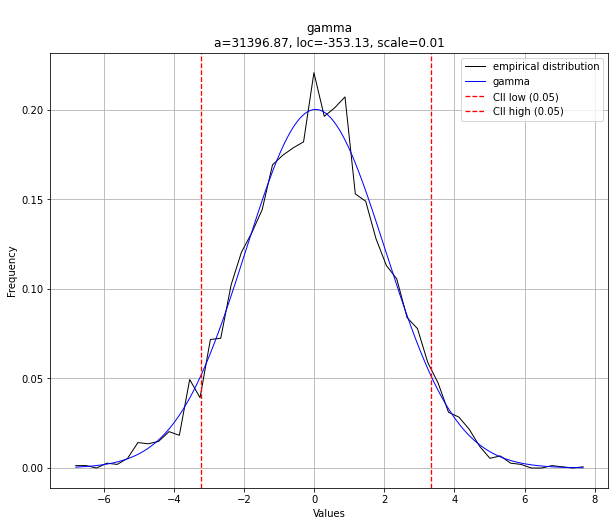

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f370af415c0>)

In [10]:
# Make plot
dist.plot()

## Predictions on new data

In [11]:
# Make prediction on new data
results = dist.predict(y)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


[distfit] >plot..


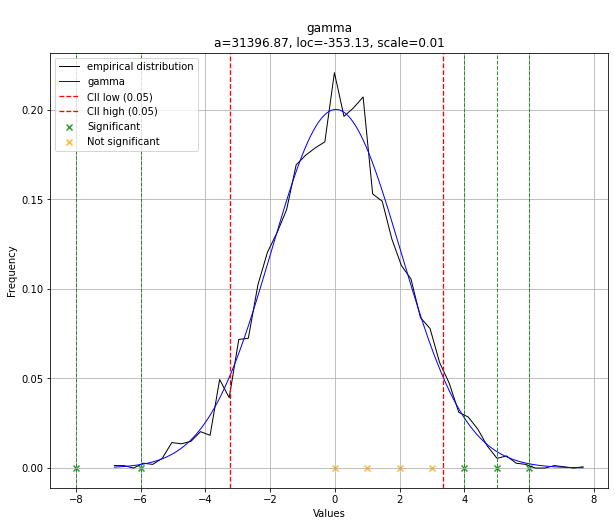

[distfit] >plot summary..


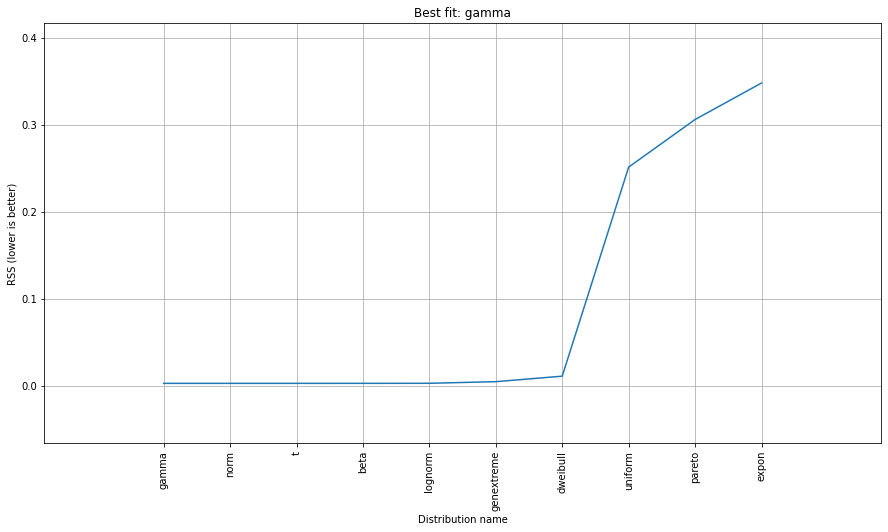

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f370ae4cc18>)

In [12]:
# plot predictions
dist.plot()
dist.plot_summary()

In [13]:
results['df']

,y,y_proba,y_pred,P
0,-8.0,0.000215,down,0.000024
1,-6.0,0.004430,down,0.001149
2,0.0,0.491612,none,0.491612
3,1.0,0.354967,none,0.315526
4,2.0,0.210086,none,0.163400
5,3.0,0.104160,none,0.069440
6,4.0,0.043092,up,0.023940
7,5.0,0.014948,up,0.006644
8,6.0,0.004430,up,0.001477


In [16]:
dist.results.keys()

dict_keys(['y', 'y_proba', 'y_pred', 'P', 'df'])

In [18]:
print(dist.results['y_proba'])
print(dist.results['y_pred'])


[2.15470337e-04 4.42967232e-03 4.91611729e-01 3.54966503e-01
 2.10085699e-01 1.04160044e-01 4.30916108e-02 1.49484792e-02
 4.42967232e-03]
['down' 'down' 'none' 'none' 'none' 'none' 'up' 'up' 'up']
